In [49]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


TM6_glial_ECM_help (generic function with 1 method)

In [50]:
using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, BenchmarkTools, IntervalRootFinding 
using CairoMakie, GLMakie
using LinearAlgebra

In [51]:
integ_set = (alg = Vern9(), adaptive = true, abstol = 1e-11, reltol = 1e-11);
tstep = 0.001; t = 1000;

In [77]:
u0 = [0.9445509341100914, 0.74116702856987, 0.7361196042973006, 0.0646914552140727, 0.15145764079879162, 0.0009327645775731449];

param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);

param[11] =  -1.741; #I0
param[6] = 0.067; # αE

In [78]:
ds= CoupledODEs(TM6_glial_ECM, u0, param, diffeq = integ_set);
tr, trange = trajectory(ds, t, Δt = tstep);

In [79]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(-1.0, 1.0), interval(-1.0, 1.0), interval(-1.0, 1.0);
ecmr, pr = interval(-1.0, 1.0), interval(-1.0, 1.0);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds, box, TM6_glial_ECM_jac, tol = 1e-15, method = IntervalRootFinding.Krawczyk);

In [80]:
CairoMakie.activate!()
xlabsize = 55; ylabsize = 55; zlabsize = 55
textsize = 55;
ticksize = 40;
lw = 1.5;
spinewidth = 3.0;
color1 = :red;
color2 = :blue;
gridvisible = false;

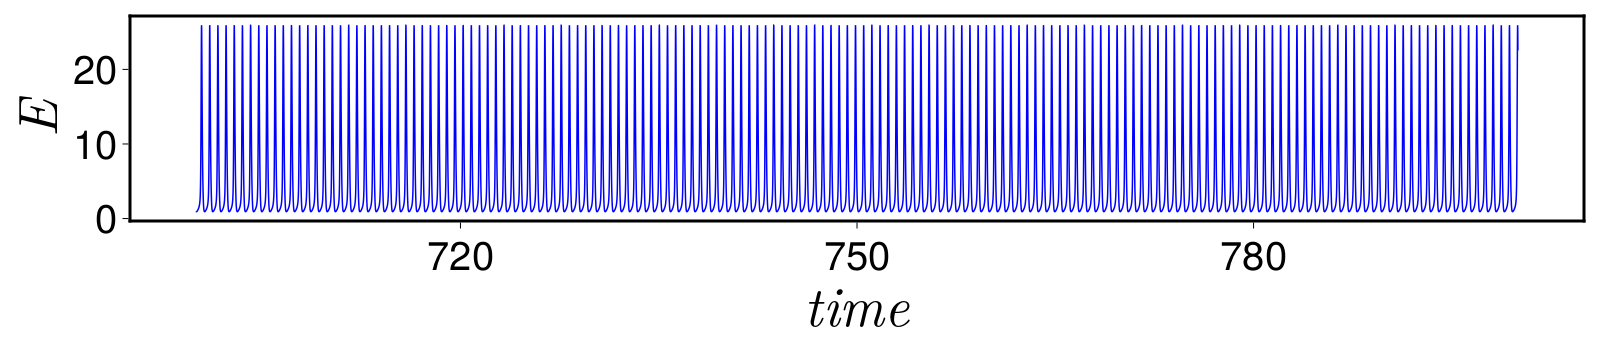

CairoMakie.Screen{IMAGE}


In [81]:
plt_start = 700000; plt_end = 800000;

width_ = 1600; height_ = 350;
xlab = L"time"; ylab = L"E";

f = Figure(resolution = (width_, height_))
ax = Axis(f[1, 1],
xlabel = xlab, ylabel = ylab, xlabelsize = xlabsize, ylabelsize = ylabsize,
xticklabelsize = ticksize, yticklabelsize = ticksize,
xgridvisible = gridvisible, ygridvisible = gridvisible,
spinewidth = spinewidth);

lines!(trange[plt_start:plt_end], tr[plt_start:plt_end, 1], linewidth = lw, color = color2);

display(f)

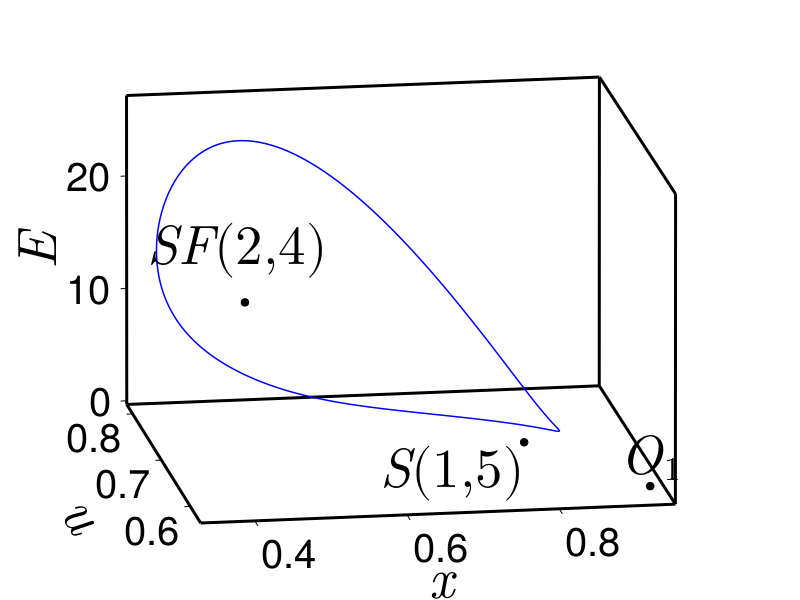

CairoMakie.Screen{IMAGE}


In [82]:
plt_start = 400000; plt_end = 900000;

index_x, index_y, index_z = 2, 3, 1;

width_ = 800; height_ = 600;
xlab = L"x"; ylab = L"u"; zlab = L"E";

azim = -0.55pi; elev = 0.08pi;

prot = 60;
disx = 40; disy = 70; disz = 60
mksize = 10;

colordot = :black

spinewidth = 3.0;

f = Figure(resolution = (width_, height_));
ax = Axis3(f[1, 1], azimuth = azim, elevation = elev,
                xlabel = xlab, ylabel = ylab, zlabel = zlab,
                xlabelsize = xlabsize, ylabelsize = ylabsize, zlabelsize = zlabsize,
                xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
                xgridvisible = gridvisible, ygridvisible = gridvisible, zgridvisible = gridvisible,
                protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz,
                xspinewidth = spinewidth, yspinewidth = spinewidth, zspinewidth = spinewidth, yticks = [0.6, 0.7, 0.8])

lines!(ax, tr[plt_start:plt_end, index_x], tr[plt_start:plt_end, index_y], tr[plt_start:plt_end, index_z], color = color2)

scatter!(ax, fp[1, index_x], fp[1, index_y], fp[1, index_z], markerksize = mksize, color = colordot);
text!(ax, fp[1, index_x], fp[1, index_y], fp[1, index_z], text = L"S(1,5)", fontsize = textsize, align = (:right, :top))

scatter!(ax, fp[2, index_x], fp[2, index_y], fp[2, index_z], markerksize = mksize, color = colordot);
text!(ax, fp[2, index_x], fp[2, index_y], fp[2, index_z], text = L"SF(2,4)", fontsize = textsize, align = (:right, :bottom), offset = (82,25))


scatter!(ax, fp[3, index_x], fp[3, index_y], fp[3, index_z], markerksize = mksize, color = colordot);
text!(ax, fp[3, index_x], fp[3, index_y], fp[3, index_z], text = L"O_1", fontsize = textsize, align = (:center, :bottom))

display(f)